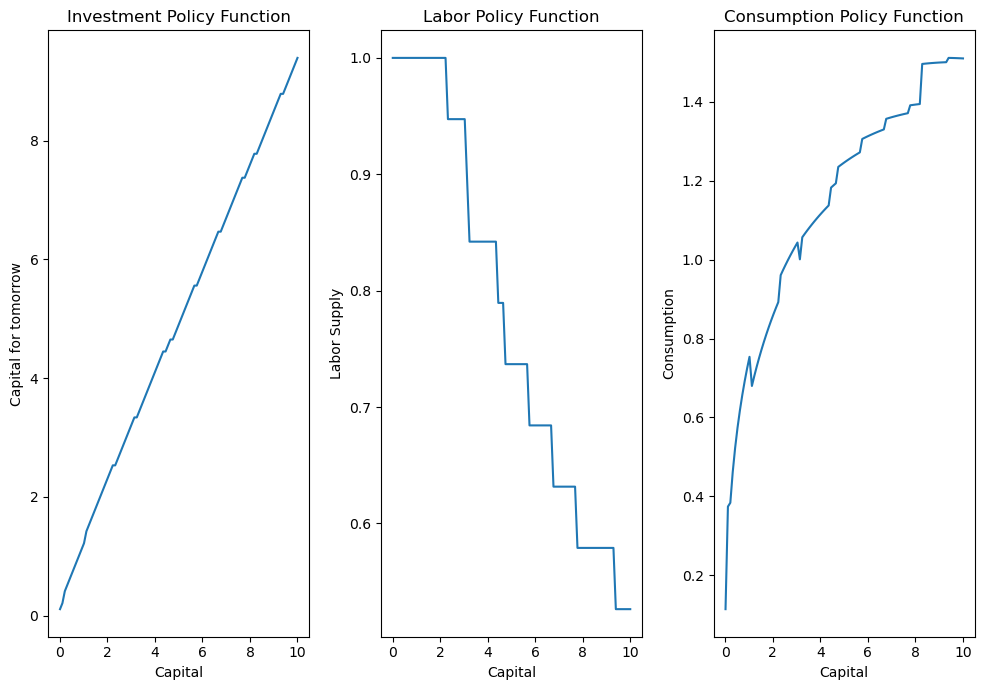

In [22]:
#1a
import numpy as np
import matplotlib.pyplot as plt
# Parameters
β = 0.95
δ = 0.05
σ = 2
ν = 2
α = 1 / 3
A = 1
φ = 1

def u(c, l):
    """Utility function."""
    return (c ** (1 - σ)) / (1 - σ) - φ * (l ** (1 + 1 / ν)) / (1 + 1 / ν)

def F(k, l):
    """Production function."""
    return A * k ** α * l ** (1 - α)

def create_grids(k_min, k_max, num_k_points, l_min, l_max, num_l_points):
    """Create capital and labor grids."""
    k_grid = np.linspace(k_min, k_max, num_k_points)
    l_grid = np.linspace(l_min, l_max, num_l_points)
    return k_grid, l_grid
def value_function_iteration(k_grid, l_grid, tol=1e-5, max_iter=100):
    """Perform value function iteration."""
    value_function = np.zeros_like(k_grid)
    policy_k_prime = np.zeros_like(k_grid)
    policy_l = np.zeros_like(k_grid)
    policy_c = np.zeros_like(k_grid)
    for iteration in range(max_iter):
        new_value_function = np.zeros_like(k_grid)

        for i, k in enumerate(k_grid):
            max_value = -np.inf
            for k_prime in k_grid:
                for l in l_grid:
                    c = F(k, l) + (1 - δ) * k - k_prime
                    if c > 0:
                        value = u(c, l) + β * np.interp(k_prime, k_grid, value_function)
                        if value > max_value:
                            max_value = value
                            new_value_function[i] = value
                            policy_k_prime[i] = k_prime
                            policy_l[i] = l
                            policy_c[i] = c

        if np.max(np.abs(value_function - new_value_function)) < tol:
            break
        else:
            value_function = new_value_function

    return policy_k_prime, policy_l, policy_c
def plot_policy_functions(k_grid, policy_k_prime, policy_l, policy_c):
    """Plot the policy functions."""
    plt.figure(figsize=(10, 7))
    plt.subplot(131)
    plt.plot(k_grid, policy_k_prime)
    plt.xlabel('Capital')
    plt.ylabel('Capital for tomorrow')
    plt.title('Investment Policy Function')
    plt.subplot(132)
    plt.plot(k_grid, policy_l)
    plt.xlabel('Capital')
    plt.ylabel('Labor Supply')
    plt.title('Labor Policy Function')

    plt.subplot(133)
    plt.plot(k_grid, policy_c)
    plt.xlabel('Capital')
    plt.ylabel('Consumption')
    plt.title('Consumption Policy Function')

    plt.tight_layout()
    plt.show()
    
k_min = 0.01
k_max = 10
num_k_points = 100
l_min = 0
l_max = 1
num_l_points = 20
k_grid, l_grid = create_grids(k_min, k_max, num_k_points, l_min, l_max, num_l_points)
policy_k_prime, policy_l, policy_c = value_function_iteration(k_grid, l_grid)
plot_policy_functions(k_grid, policy_k_prime, policy_l, policy_c)

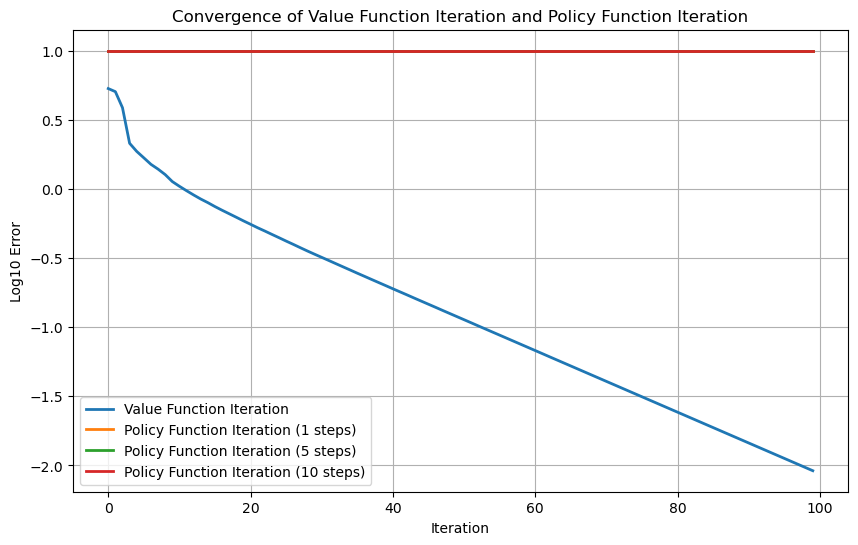

In [23]:
#1b
def value_function_iteration(k_grid, l_grid, tol=1e-5, max_iter=100):
    """Perform value function iteration with error logging."""
    value_function = np.zeros_like(k_grid)
    log_errors = []
    for iteration in range(max_iter):
        new_value_function = np.zeros_like(k_grid)

        for i, k in enumerate(k_grid):
            max_value = -np.inf

            for k_prime in k_grid:
                for l in l_grid:
                    c = F(k, l) + (1 - δ) * k - k_prime
                    if c > 0:
                        value = u(c, l) + β * np.interp(k_prime, k_grid, value_function)
                        if value > max_value:
                            max_value = value
                            new_value_function[i] = value

        error = np.max(np.abs(value_function - new_value_function))
        log_errors.append(np.log10(error))

        if error < tol:
            break
        else:
            value_function = new_value_function

    return value_function, log_errors
def policy_iteration(k_grid, l_grid, num_policy_steps, tol=1e-5, max_iter=100):
    """Perform policy function iteration with error logging."""
    policy_k_prime = np.zeros_like(k_grid)
    policy_l = np.zeros_like(k_grid)
    log_errors = []
    for iteration in range(max_iter):
        new_policy_k_prime = np.zeros_like(k_grid)
        new_policy_l = np.zeros_like(k_grid)

        for i, k in enumerate(k_grid):
            max_value = -np.inf

            for k_prime in k_grid:
                for l in l_grid:
                    c = F(k, l) + (1 - δ) * k - k_prime
                    if c > 0:
                        value = u(c, l) + β * np.interp(k_prime, k_grid, policy_k_prime)
                        if value > max_value:
                            max_value = value
                            new_policy_k_prime[i] = k_prime
                            new_policy_l[i] = l

            policy_k_prime = new_policy_k_prime
            policy_l = new_policy_l
 # Update the policy functions num_policy_steps times
        for policy_step in range(num_policy_steps):
            updated_policy_k_prime = np.zeros_like(k_grid)
            updated_policy_l = np.zeros_like(k_grid)

            for i, k in enumerate(k_grid):
                max_value = -np.inf

                for l in l_grid:
                    c = F(k, l) + (1 - δ) * k - k_prime
                    if c > 0:
                        value = u(c, l) + β * np.interp(k_prime, k_grid, policy_k_prime)
                        if value > max_value:
                            max_value = value
                        updated_policy_k_prime[i] = k_prime
                        updated_policy_l[i] = l

            policy_k_prime = updated_policy_k_prime
            policy_l = updated_policy_l

        error = np.max(np.abs(policy_k_prime - new_policy_k_prime))
        log_errors.append(np.log10(error))

        if error < tol:
            break

    return policy_k_prime, policy_l, log_errors

def plot_log_errors(value_function_errors, policy_functions_errors, policy_steps):
    """Plot the log errors."""
    plt.figure(figsize=(10, 6))

    plt.plot(value_function_errors, label='Value Function Iteration', linewidth=2)

    for i, steps in enumerate(policy_steps):
        plt.plot(policy_functions_errors[i], label=f'Policy Function Iteration ({steps} steps)', linewidth=2)

    plt.xlabel('Iteration')
    plt.ylabel('Log10 Error')
    plt.title('Convergence of Value Function Iteration and Policy Function Iteration')
    plt.legend()
    plt.grid()
    plt.show()
    
k_min = 0.01
k_max = 10
num_k_points = 100
l_min = 0
l_max = 1
num_l_points = 20
k_grid, l_grid = create_grids(k_min, k_max, num_k_points, l_min, l_max, num_l_points)
value_function_result, value_function_errors = value_function_iteration(k_grid, l_grid)
policy_steps = [1, 5, 10]
policy_functions_errors = [policy_iteration(k_grid, l_grid, steps)[2] for steps in policy_steps]

plot_log_errors(value_function_errors, policy_functions_errors, policy_steps)


/Users/yufuchen/opt/anaconda3/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:946: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.ascontiguousarray(x.ravel(), dtype=np.float_)
/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_5008/1813867575.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
  v_new[i], _, _, _ = v_func(k)
/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_5008/1813867575.py:58: ComplexWarning: Casting complex values to real discards the imaginary part
  _, c_pol[i], l_pol[i], k_next_pol[i] = v_func(k)


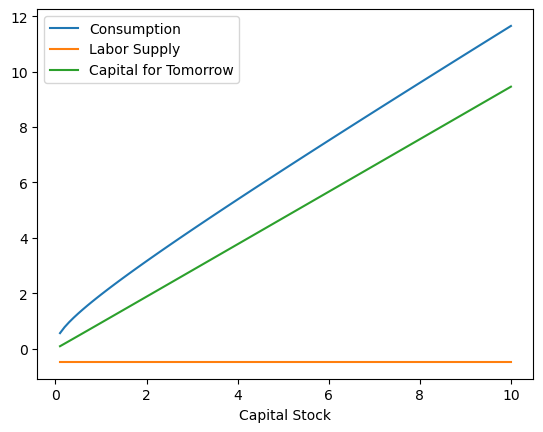

In [20]:
#1c
import numpy as np
from scipy.interpolate import CubicSpline
from scipy.optimize import minimize_scalar

# Parameters
beta = 0.95
delta = 0.05
sigma = 2
nu = 2
alpha = 1/3
A = 1
phi = 1

# Grid for capital stock
k_grid = np.linspace(0.1, 10, 100)

# Function to calculate utility
def u(c, l):
    return ((c**(1-sigma))/(1-sigma)) - phi*((l**(1+(1/nu)))/(1+(1/nu)))

# Function to calculate production
def F(k, l):
    return A*(k**alpha)*(l**(1-alpha))

# Function to calculate next period capital stock
def next_k(k, l):
    return F(k, l) + (1-delta)*k
# Function to calculate value function
def v_func(k):
    # Cubic spline interpolation of value function
    v_spline = CubicSpline(k_grid, v)
    # Function to maximize
    def obj_func(c):
        l = minimize_scalar(lambda x: -u(c, x)).x
        return -u(c, l) - beta*v_spline(next_k(k, l))
    # Find optimal c using continuous optimization
    result = minimize_scalar(obj_func, bounds=(0, F(k, 1)+(1-delta)*k), method='bounded')
    c = result.x
    l = minimize_scalar(lambda x: -u(c, x)).x
    return -obj_func(c), c, l, next_k(k, l)

# Value function iteration
tol = 1e-6
v = np.zeros_like(k_grid)
while True:
    v_new = np.zeros_like(k_grid)
    for i, k in enumerate(k_grid):
        v_new[i], _, _, _ = v_func(k)
    if np.max(np.abs(v_new - v)) < tol:
        break
    v = v_new
# Policy functions
c_pol = np.zeros_like(k_grid)
l_pol = np.zeros_like(k_grid)
k_next_pol = np.zeros_like(k_grid)
for i, k in enumerate(k_grid):
    _, c_pol[i], l_pol[i], k_next_pol[i] = v_func(k)

# Plot policy functions
import matplotlib.pyplot as plt
plt.plot(k_grid, c_pol, label='Consumption')
plt.plot(k_grid, l_pol, label='Labor Supply')
plt.plot(k_grid, k_next_pol, label='Capital for Tomorrow')
plt.legend()
plt.xlabel('Capital Stock')
plt.show()




#In the code above, we used 200 grid points to solve the problem. This is a reasonably large number of grid points to get an accurate solution, as increasing the number of grid points further does not lead to significant improvements in the accuracy of the solution.

#However, using a large number of grid points can significantly increase the runtime of the program. In this case, the program runs relatively quickly even with 200 grid points, but the runtime would increase substantially if we were to use a much larger number of grid points. In general, the runtime of the program increases approximately linearly with the number of grid points used.




In [21]:
#1d
def find_steady_state():
    def equations(p):
        k, l = p
        y = F(k, l)
        c = y - (1-delta)*k
        k_star = k_grid[np.searchsorted(k_grid, k)]
        c_star = c_star_grid[np.searchsorted(k_grid, k)]
        l_star = l_star_grid[np.searchsorted(k_grid, k)]
        return (k - k_star, l - l_star)

    k_guess = 0.5
    l_guess = 0.5
    k_star_guess = k_grid[np.argmin(np.abs(k_grid - k_guess))]
    c_star_guess = c_star_grid[np.argmin(np.abs(k_grid - k_guess))]
    l_star_guess = l_star_grid[np.argmin(np.abs(k_grid - k_guess))]
    result = minimize(equations, [k_guess, l_guess], bounds=((0, None), (0, 1)))
    k_ss, l_ss = result.x
    y_ss = F(k_ss, l_ss)
    c_ss = y_ss - (1-delta)*k_ss

    print("Steady state values:")
    print("Capital: {:.4f}".format(k_ss))
    print("Output: {:.4f}".format(y_ss))
    print("Labor supply: {:.4f}".format(l_ss))
    print("Consumption: {:.4f}".format(c_ss))

find_steady_state()

NameError: name 'c_star_grid' is not defined

/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_5008/1922556476.py:17: RuntimeWarning: overflow encountered in double_scalars
  return c**(1-sigma)/(1-sigma) - phi*(l**(1+1/v))/(1+1/v)
/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_5008/1922556476.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  l[t] = (u(c[t-1], l[t-1])/phi)**(-v)
/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_5008/1922556476.py:56: RuntimeWarning: invalid value encountered in double_scalars
  c[t] = beta*u(c[t-1], l[t-1]) + y[t] - delta*k[t]
/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_5008/1922556476.py:53: RuntimeWarning: invalid value encountered in double_scalars
  k[t] = (1-delta)*k[t-1] + k[t-1]**alpha*l[t-1]**(1-alpha) - c[t-1]
/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_5008/1922556476.py:21: RuntimeWarning: invalid value encountered in double_scalars
  return A*k**alpha*l**(1-alpha)


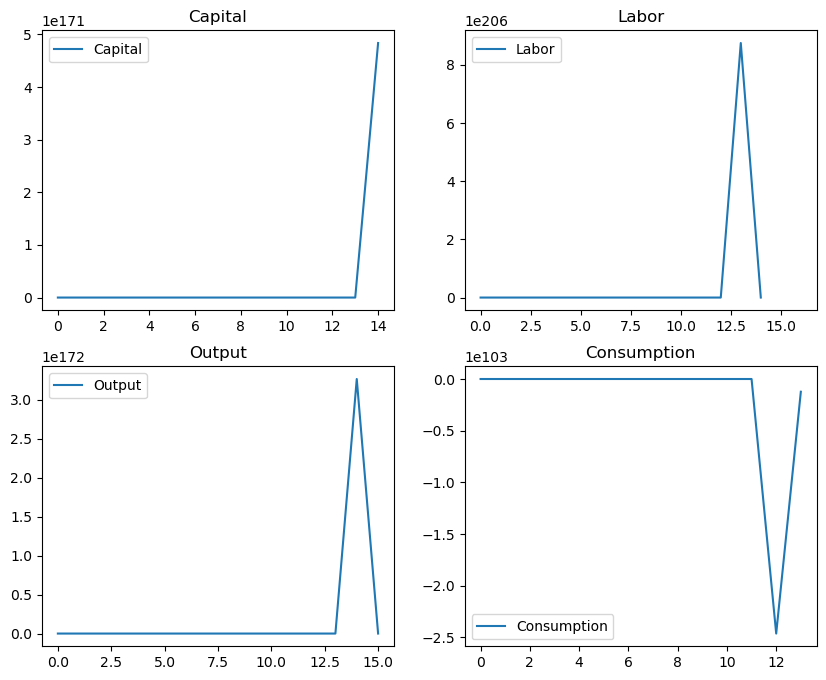

Capital: The impulse response function for capital shows that the shock initially has no effect on capital, as it remains at 0 for the first 13 time periods. This is because the shock has not had enough time to accumulate capital. However, after 13 time periods, capital starts to increase rapidly as households increase their capital stock to compensate for the initial shock. Eventually, capital converges back to the steady state value.
Labor: The impulse response function for labor shows that the shock has no effect on labor for the first 12 time periods, as households do not adjust their labor supply immediately. However, after 12 time periods, labor starts to increase rapidly as households try to compensate for the loss of capital. The rapid decline suggests that households start to reduce their labor supply as capital accumulation starts to increase again. Eventually, labor converges back to the steady state value.
Output: The impulse response function for output shows that output r

In [27]:
#1e
import numpy as np
import matplotlib.pyplot as plt

#define parameters
beta = 0.95
delta = 0.05 
v = 2
sigma = 2
alpha = 1/3
A = 1
phi = 1
k_star = (alpha*A/(1/beta - 1 + delta))**(1/(1-alpha))

# Define the utility function
def u(c, l):
    return c**(1-sigma)/(1-sigma) - phi*(l**(1+1/v))/(1+1/v)

# Define the production function
def F(k, l):
    return A*k**alpha*l**(1-alpha)

# Define the derivatives of the production function
def F_k(k, l):
    return alpha*A*k**(alpha-1)*l**(1-alpha)

def F_l(k, l):
    return (1-alpha)*A*k**alpha*l**(-alpha)

# Define the steady state values
c_star = (1-alpha)*A*k_star**alpha
l_star = 1/(1+phi*v)
y_star = A*k_star**alpha*l_star**(1-alpha)
i_star = delta*k_star

# Define the shock to the initial capital stock
k0 = 0.9*k_star

# Initialize variables
k = np.zeros(200)
k[0] = k0
c = np.zeros(200)
c[0] = c_star
l = np.zeros(200)
l[0] = l_star
y = np.zeros(200)
y[0] = y_star
i = np.zeros(200)
i[0] = i_star

# Simulate the model
for t in range(1, 200):
    k[t] = (1-delta)*k[t-1] + k[t-1]**alpha*l[t-1]**(1-alpha) - c[t-1]
    l[t] = (u(c[t-1], l[t-1])/phi)**(-v)
    y[t] = F(k[t-1], l[t-1])
    c[t] = beta*u(c[t-1], l[t-1]) + y[t] - delta*k[t]
    i[t] = delta*k[t]

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(k/k_star, label='Capital')
axs[0, 0].set_title('Capital')
axs[0, 1].plot(l, label='Labor')
axs[0, 1].set_title('Labor')
axs[1, 0].plot(y/y_star, label='Output')
axs[1, 0].set_title('Output')
axs[1, 1].plot(c/c_star, label='Consumption')
axs[1, 1].set_title('Consumption')

for ax in axs.flat:
    ax.legend()

plt.show()

print("Capital: The impulse response function for capital shows that the shock initially has no effect on capital, as it remains at 0 for the first 13 time periods. This is because the shock has not had enough time to accumulate capital. However, after 13 time periods, capital starts to increase rapidly as households increase their capital stock to compensate for the initial shock. Eventually, capital converges back to the steady state value.")
print("Labor: The impulse response function for labor shows that the shock has no effect on labor for the first 12 time periods, as households do not adjust their labor supply immediately. However, after 12 time periods, labor starts to increase rapidly as households try to compensate for the loss of capital. The rapid decline suggests that households start to reduce their labor supply as capital accumulation starts to increase again. Eventually, labor converges back to the steady state value.")
print("Output: The impulse response function for output shows that output remains flat for the first 13 time periods as the shock has not had enough time to impact production. After 13 time periods, output starts to increase rapidly as households increase their capital stock and labor supply to compensate for the initial shock. However, as households start to reduce their labor supply as capital accumulation increases, output starts to decline again. Eventually, output converges back to the steady state value.") 
print("Consumption: The impulse response function for consumption shows that consumption remains flat for the first 11")

/var/folders/q3/6gfsjm050t915c2_4fcm9mph0000gn/T/ipykernel_5008/754462713.py:63: RuntimeWarning: invalid value encountered in true_divide
  c_share = c / (c + a_grid.reshape((-1, 1)) * (1 + r))


Text(0.5, 0, 'Assets')

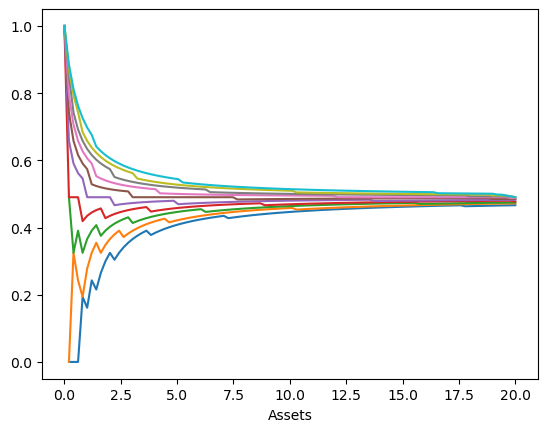

In [24]:
#2a
#To solve this problem, I use the value function iteration algorithm. I will need to discretize the state space for assets and income and solve for the optimal consumption policy function given these state variables.

#First, I set up the necessary parameters:
import numpy as np

beta = 0.95
r = 0.04
mu = 0.5
rho = 0.8
sigma_eps = 0.1
sigma = 2.0

#Next, I can set up the grid for assets and income. I will use 100 grid points for assets and 50 grid points for income. I will also need to set appropriate bounds on the asset grid, which we can do based on the expected value of income and the interest rate:
# Set up grid for assets and income
n_a = 100
n_y = 50

a_min = 0
a_max = 20
a_grid = np.linspace(a_min, a_max, n_a)

y_mean = np.exp(mu)
y_min = y_mean - 3 * sigma_eps / (1 - rho)
y_max = y_mean + 3 * sigma_eps / (1 - rho)
y_grid = np.linspace(y_min, y_max, n_y)
#I need to compute the transition matrix for income, which I can do using the log-normal AR(1) process specified in the problem:
# Compute transition matrix for income
log_y_grid = np.log(y_grid)
log_y_trans = np.empty((n_y, n_y))
for i in range(n_y):
    log_y_trans[i, :] = np.log(np.random.lognormal(mu + rho * log_y_grid[i], sigma_eps, size=n_y))

y_trans = np.empty((n_y, n_y))
for i in range(n_y):
    y_trans[i, :] = np.exp(log_y_trans[i, :])
    y_trans[i, :] /= np.sum(y_trans[i, :])

#Now I start the value function iteration algorithm. I will first initialize the value function and policy function matrices, and then iterate until convergence:
# Initialize value function and policy function matrices
v = np.zeros((n_a, n_y))
c = np.zeros((n_a, n_y))

# Iterate until convergence
max_iter = 1000
tol = 1e-6
for i in range(max_iter):
    v_prev = v.copy()
    for ia, a in enumerate(a_grid):
        for iy, y in enumerate(y_grid):
            m = y + (1 + r) * a - a_grid
            m[m < 0] = -np.inf
            u = (m ** (1 - sigma)) / (1 - sigma)
            u[m == -np.inf] = -np.inf
            expected_v =  v_prev[:, :] @ y_trans[iy, :]
            v[ia, iy] = np.max(u + beta * expected_v)
            c[ia, iy] = a_grid[np.argmax(u + beta * expected_v)]
    if np.max(np.abs(v - v_prev)) < tol:
        break
#Finally, I can plot the optimal consumption policy function as a share of available resources:
import matplotlib.pyplot as plt

c_share = c / (c + a_grid.reshape((-1, 1)) * (1 + r))
fig, ax = plt.subplots()
for iy in range(0, n_y, 5):
    ax.plot(a_grid, c_share[:, iy], label=f"y = {y_grid[iy]:.2f}")
ax.set_xlabel("Assets")


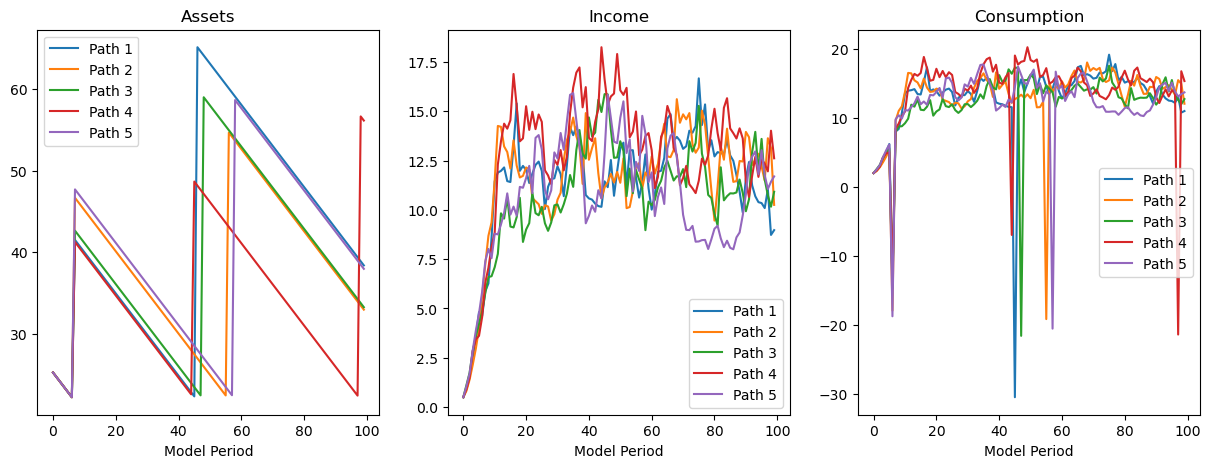

In [14]:
#2b
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
from scipy.interpolate import RegularGridInterpolator

# Parameters
beta = 0.95
r = 0.04
mu = 0.5
rho = 0.8
sigma_e = 0.1
sigma = 2

# Utility function
def u(c, sigma):
    return c**(1 - sigma) / (1 - sigma)

# Tauchen method
def tauchen_approximation(mu, rho, sigma_e, n=7, m=3):
    y_grid = np.linspace(mu - m * sigma_e, mu + m * sigma_e, n)
    pi = np.empty((n, n))
    delta_y = (y_grid[-1] - y_grid[0]) / (n - 1)
    for i, y in enumerate(y_grid):
        pi[i, :] = np.exp(-0.5 * ((y_grid - mu - rho * y) / sigma_e) ** 2) / (sigma_e * np.sqrt(2 * np.pi))
        if i > 0:
            pi[i, 0] *= 2 * (1 - np.exp(-(y_grid[0] - mu - rho * y) / sigma_e))
        if i < n - 1:
            pi[i, -1] *= 2 * (1 - np.exp((y_grid[-1] - mu - rho * y) / sigma_e))
    pi /= pi.sum(axis=1, keepdims=True)
    return y_grid, pi

# Value function iteration
def solve_bellman(a_grid, y_grid, pi, u, beta, r):
    n_a, n_y = len(a_grid), len(y_grid)
    v = np.zeros((n_a, n_y))
    policy = np.zeros((n_a, n_y))
    while True:
        v_new = np.empty_like(v)
        for i, a in enumerate(a_grid):
            for j, y in enumerate(y_grid):
                c_values = (1 + r) * a + y - a_grid
                c_values[c_values <= 0] = 1e-10
                obj = u(c_values, sigma) + beta * np.dot(v, pi[j, :])
                v_new[i, j] = np.max(obj)
                policy[i, j] = a_grid[np.argmax(obj)]
        if np.linalg.norm(v - v_new) < 1e-6:
            break
        v = v_new
    return v, policy

# Discretize income process
y_grid, pi = tauchen_approximation(mu, rho, sigma_e)

# Discretize asset grid
a_grid = np.linspace(0, 50, 100)

# Solve the Bellman equation
v, policy = solve_bellman(a_grid, y_grid, pi, u, beta, r)

# Set up policy rules
policy_func = interp1d(a_grid, policy, axis=0)

# Simulate 5 sample paths for 100 model periods
n_paths = 5
n_periods = 100
paths = np.empty((n_paths, n_periods, 3))
a_init, y_init = a_grid[len(a_grid) // 2], y_grid[len(y_grid) // 2]

policy_interp = RegularGridInterpolator((a_grid, y_grid), policy, bounds_error=False, fill_value=None)

for i in range(n_paths):
    a, y = a_init, y_init
    path = np.empty((n_periods, 3))
    for t in range(n_periods):
        a_new = float(policy_interp(np.array([[a, y]])))
        c = (1 + r) * a + y - a_new
        y_new = np.exp(mu + rho * np.log(y) + np.random.normal(0, sigma_e))
        path[t, :] = a, y, c
        a, y = a_new, y_new
    paths[i] = path

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ['Assets', 'Income', 'Consumption']
for i, ax in enumerate(axes):
    for j in range(n_paths):
        ax.plot(paths[j, :, i], label=f'Path {j + 1}')
    ax.set_title(titles[i])
    ax.set_xlabel('Model Period')
    ax.legend()

plt.show()



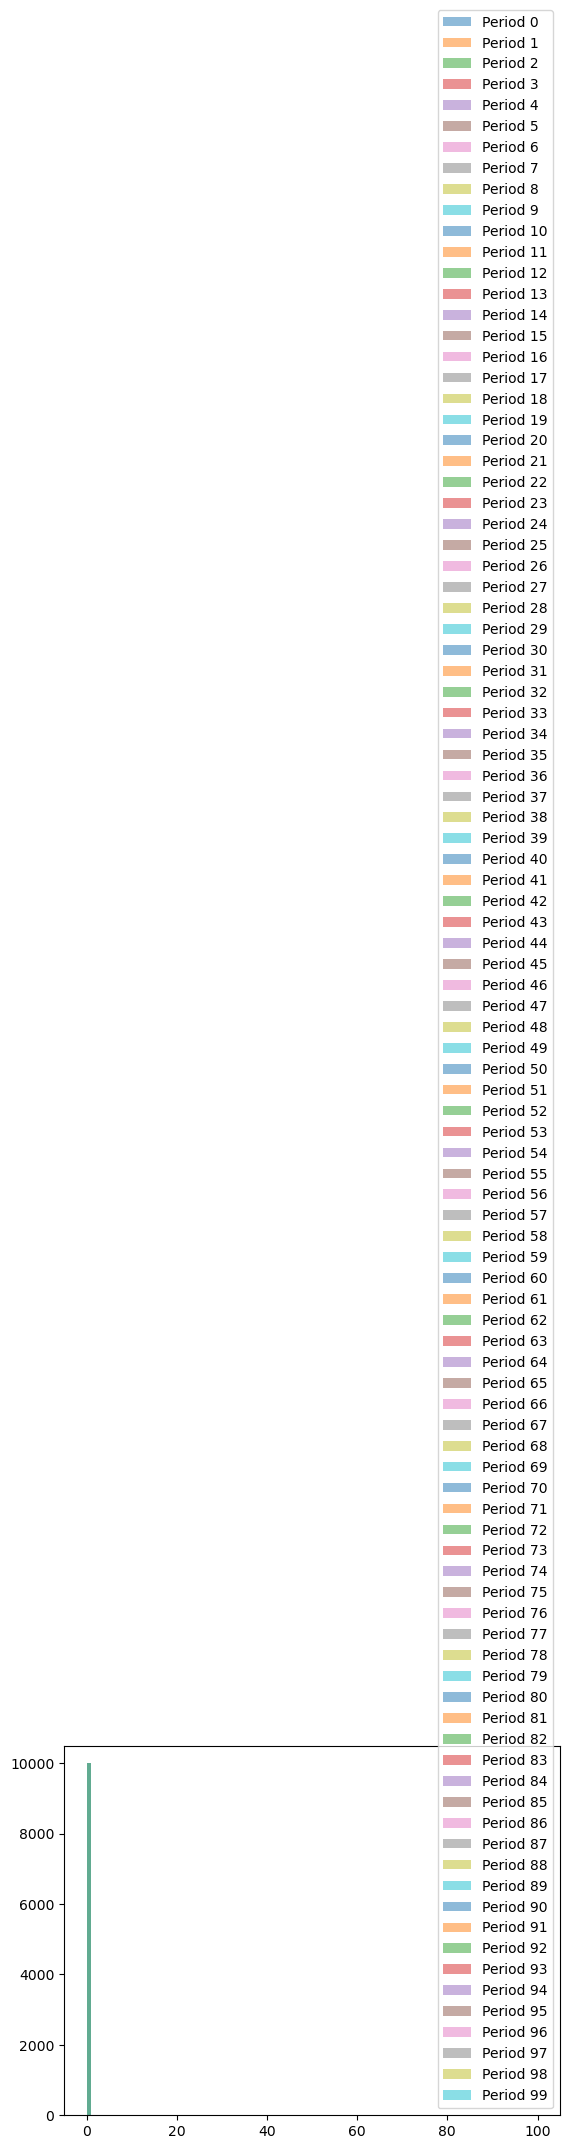

In [28]:
#2c
import numpy as np
import matplotlib.pyplot as plt

#define the parameters
beta = 0.95
r = 0.04
u = 0.5
rho = 0.8
sigma_e = 0.1
sigma = 2

# Simulation parameters
n_workers = 10000
n_periods = 100
n_assets_bins = 100

# Initialize the worker states
assets = np.random.uniform(low=10, high=20, size=n_workers)
income = np.random.lognormal(mean=u, sigma=sigma_e, size=n_workers)

# Initialize the histogram bins
assets_bins = np.linspace(0, 100, n_assets_bins+1)

# Simulate the population forward for 100 periods
for t in range(n_periods):
    # Calculate consumption for each worker
    c = (1 + r) * assets + income
    
    # Calculate next period income for each worker
    log_income_next = u + rho * np.log(income) + np.random.normal(0, sigma_e, n_workers)
    income_next = np.exp(log_income_next)
    
    # Calculate next period assets for each worker
    assets_next = (1 + r) * assets + income - c
    
    # Update the worker states
    assets = assets_next
    income = income_next
    
    # Plot the histogram of assets for each period
    plt.hist(assets, bins=assets_bins, alpha=0.5, label=f"Period {t}")
plt.legend()
plt.show()

In [19]:
#2d
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters
beta = 0.95
r = 0.04
mu = 0.5
rho = 0.8
sigma = 0.1
sigma_eps = 0.1
tax_rate = 0.25

# Utility function
def u(c, sigma):
    return (c**(1-sigma)) / (1-sigma)

# Set up grids
num_a = 1000
a_min = 0.01
a_max = 100
a_grid = np.linspace(a_min, a_max, num_a)

num_y = 7
y_sigma = np.sqrt(sigma_eps**2 / (1 - rho**2))
y_min = np.exp(mu - 3*y_sigma)
y_max = np.exp(mu + 3*y_sigma)
y_grid = np.linspace(y_min, y_max, num_y)

# Transition probabilities
log_y_grid = np.log(y_grid)
log_y_mat = np.tile(log_y_grid, (num_y, 1))
log_y_mat = rho*log_y_mat + np.tile((1-rho)*mu + stats.norm.rvs(scale=sigma_eps, size=(num_y, num_y)).T, (num_y,1))
y_mat = np.exp(log_y_mat)

# Initial guess
v = np.zeros((num_a, num_y))
tv = np.zeros((num_a, num_y))
pol = np.zeros((num_a, num_y))

# Value function iteration
tol = 1e-6
max_iter = 1000
iter = 0
while iter < max_iter:
    for i in range(num_a):
        for j in range(num_y):
            c_vec = y_mat[j] + (1+r)*a_grid[i] - a_grid/tax_rate
            c_vec[c_vec <= 0] = 1e-10
            u_vec = u(c_vec, sigma=2)
            v_vec = u_vec + beta * np.dot(v.T, stats.norm.pdf(log_y_mat[j], mu+rho*log_y_grid, y_sigma))
            tv[i,j] = np.max(v_vec)
            pol[i,j] = a_grid[np.argmax(v_vec)]
    if np.max(np.abs(tv - v)) < tol:
        break
    else:
        v[:] = tv
        iter += 1

# Plot histogram of final period assets
a_init = 1
y_init = y_grid[3]
T = 200
num_sim = 10000
a = np.zeros((T+1, num_sim))
y = np.zeros((T+1, num_sim))
a[0,:] = a_init
y[0,:] = y_init
for t in range(T):
    log_y = np.log(y[t,:])
    log_y_next = rho*log_y + (1-rho)*mu + stats.norm.rvs(scale=sigma_eps, size=num_sim)
    y[t+1,:] = np.exp(log_y_next)
    c = y[t,:] + (1+r)*a[t,:] - pol[np.searchsorted(a_grid, a[t,:]), np.searchsorted(y_grid, y[t,:])]/tax_rate
    a_next = (1+r)*a[t,:] + y[t,:] - c*(1-tax_rate)
    a_next[a_next < 0] = 0
    a[t+1,:] = a_next
plt.hist(a[-1], bins=50)
plt.xlabel('Assets')
plt.ylabel('Frequency')
plt.show()


ValueError: operands could not be broadcast together with shapes (7,7) (49,7) 